![Immoscout](https://raw.githubusercontent.com/juliandnl/redi_ss20/master/image.png)

### Immobilien Scout 24 Dataset 
It contains entries from rental flats in Berlin. Lets explore the dataset and find a suitable flat for my friend Josy, who is currently, desperately searching for a new flat in Berlin.

### Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


In [3]:
df.shape

(764, 6)

In [4]:
df.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


In [5]:
# Howmany unique regions are there in dataset
df.Region.nunique()

10

In [6]:
df.Region.unique()

array(['Mitte', 'Kreuzberg', 'Köpenick', 'Wilmersdorf', 'Charlottenburg',
       'Friedrichsfelde', 'Tiergarten', 'Prenzlauer', 'Wedding',
       'Neukölln'], dtype=object)

In [7]:
df.Space.max()

413.91

In [8]:
#what is the smales flat
smallst_flat = df[df.Space == df.Space.min()]
smallst_flat

,Region,Condition,Rooms,Rent,Year_Construction,Space
84,Neukölln,well_kept,1.0,450.0,1910,14.0


In [9]:
#what is largest flats
largest_flat = df[df.Space == df.Space.max()]
largest_flat

,Region,Condition,Rooms,Rent,Year_Construction,Space
694,Mitte,mint_condition,5.0,14207.0,2015,413.91


## What is on average the most expensive region

In [10]:
exp_regions = df.Rent.groupby(df.Region).mean().sort_values(ascending = False)
exp_regions

Region
Mitte              2408.725033
Kreuzberg          2049.138085
Prenzlauer         1996.962264
Tiergarten         1914.824795
Charlottenburg     1753.452532
Wilmersdorf        1748.646226
Neukölln           1188.114915
Köpenick           1125.475818
Friedrichsfelde    1043.871731
Wedding             847.138571
Name: Rent, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

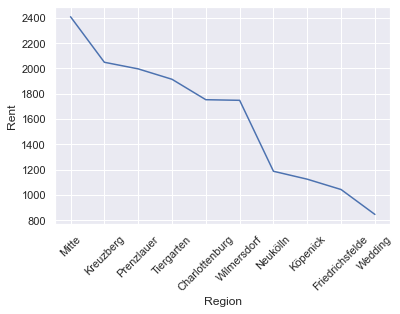

In [11]:
plt.plot(exp_regions)
plt.xlabel('Region')
plt.ylabel('Rent')
plt.xticks(rotation=45)
plt.show

## What is on average rent and size of each region categorized by size of place

In [12]:
cols = ['Space','Rent']
largest_regions = df.groupby('Region')[cols].mean().sort_values(by ='Space',ascending = False)
largest_regions = largest_regions.reset_index()
largest_regions

,Region,Space,Rent
0,Mitte,96.235556,2408.725033
1,Prenzlauer,95.832264,1996.962264
2,Kreuzberg,92.258723,2049.138085
3,Tiergarten,90.228304,1914.824795
4,Charlottenburg,88.083038,1753.452532
5,Wilmersdorf,85.536604,1748.646226
6,Köpenick,74.279273,1125.475818
7,Neukölln,69.849831,1188.114915
8,Friedrichsfelde,66.145000,1043.871731
9,Wedding,46.928571,847.138571


In [13]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

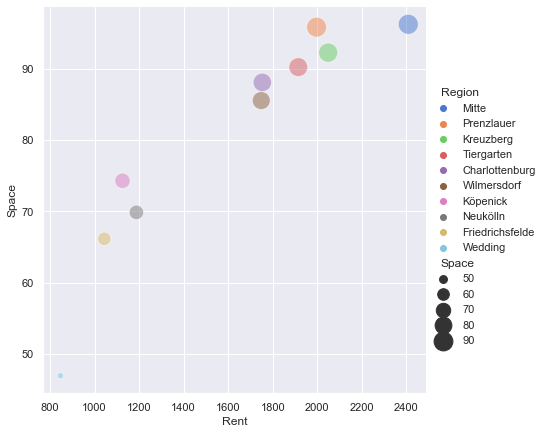

In [14]:
sns.relplot(x = 'Rent', y='Space', hue = 'Region', size="Space",
            sizes=(40, 400), alpha=.5, palette="muted", height=6,data =largest_regions )

## What is the average number of rooms and size of each region categorized by the number of rooms.

In [15]:
cols_ = ['Space','Rooms']
rooms_space_regions = df.groupby('Region')[cols_].mean().sort_values(by ='Rooms',ascending = False)
rooms_space_regions = rooms_space_regions.reset_index()
rooms_space_regions

,Region,Space,Rooms
0,Mitte,96.235556,2.754902
1,Tiergarten,90.228304,2.736842
2,Prenzlauer,95.832264,2.660377
3,Wilmersdorf,85.536604,2.613208
4,Charlottenburg,88.083038,2.525316
5,Friedrichsfelde,66.145000,2.500000
6,Kreuzberg,92.258723,2.489362
7,Köpenick,74.279273,2.281818
8,Neukölln,69.849831,2.279661
9,Wedding,46.928571,1.726190


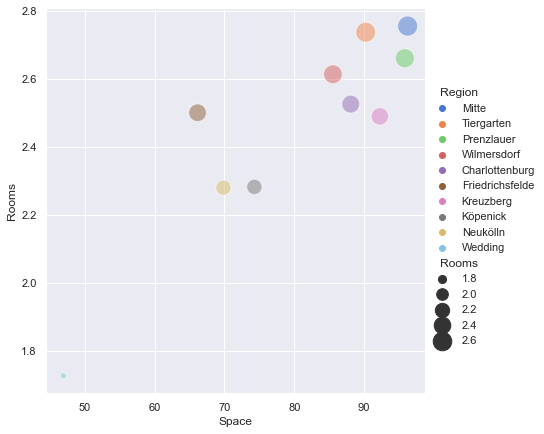

In [16]:
sns.relplot(x = 'Space', y='Rooms', hue = 'Region', size="Rooms",
            sizes=(40, 400), alpha=.5, palette="muted", height=6,data =rooms_space_regions )

## Which region has the best price per square meter? The cheapest square meter price?

In [21]:
best_price = df.groupby('Region')[['Rent','Space']].mean().sort_values(by ='Rent',ascending = True).reset_index()
best_price['sq/price'] = best_price['Rent'] / best_price['Space']
best_price.sort_values(by = 'sq/price')

,Region,Rent,Space,sq/price
2,Köpenick,1125.475818,74.279273,15.151950
1,Friedrichsfelde,1043.871731,66.145000,15.781567
3,Neukölln,1188.114915,69.849831,17.009560
0,Wedding,847.138571,46.928571,18.051659
5,Charlottenburg,1753.452532,88.083038,19.906813
4,Wilmersdorf,1748.646226,85.536604,20.443251
7,Prenzlauer,1996.962264,95.832264,20.838100
6,Tiergarten,1914.824795,90.228304,21.221997
8,Kreuzberg,2049.138085,92.258723,22.210779
9,Mitte,2408.725033,96.235556,25.029471


### According to te latest table we can see Köpenick is the cheapest Region according to average rent / space

## Which region has on average the oldest buildings?

In [185]:
oldest = df.groupby('Region')['Year_Construction'].mean().sort_values(ascending = True)
oldest

Region
Prenzlauer         1957.150943
Neukölln           1963.525424
Wilmersdorf        1966.245283
Charlottenburg     1969.987342
Wedding            1977.214286
Kreuzberg          1977.872340
Köpenick           1983.109091
Tiergarten         1992.859649
Mitte              2000.921569
Friedrichsfelde    2002.538462
Name: Year_Construction, dtype: float64

### Prenzlauer has the oldest apartements in Berlin 

## Which region has the best "in shape" flats to offer?

In [22]:
df.Condition.unique()

array(['no_information', 'need_of_renovation', 'well_kept', 'modernized',
       'fully_renovated', 'first_time_use_after_refurbishment',
       'mint_condition', 'first_time_use', 'refurbished'], dtype=object)

In [36]:
# I considered these conditions as in shape condition!
inshape_cases = ['first_time_use', 'well_kept','fully_renovated', 'first_time_use_after_refurbishment','modernized','mint_condition']
def inshape(item):
    if item in inshape_cases:
        return True
    else:
        return False

In [37]:
df['in shape'] = df['Condition'].apply(lambda x: inshape(x))
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,sq/price,in shape
540,Friedrichsfelde,no_information,3.0,575.45,1970,73.50,7.829252,False
97,Wedding,no_information,2.0,383.46,1890,48.23,7.950653,False
313,Tiergarten,no_information,2.0,547.90,1900,63.00,8.696825,False
182,Wedding,need_of_renovation,3.0,670.86,1970,76.00,8.827105,False
274,Neukölln,well_kept,3.0,565.63,1900,64.00,8.837969,True


In [38]:
in_shape_group= df.groupby('Region')['in shape'].count().sort_values(ascending = False)
in_shape_group

Region
Tiergarten         171
Mitte              153
Charlottenburg      79
Neukölln            59
Köpenick            55
Prenzlauer          53
Wilmersdorf         53
Friedrichsfelde     52
Kreuzberg           47
Wedding             42
Name: in shape, dtype: int64

## Tiergarten & Mitte has more in shape cases

## Question : Does the shape have an influence on the price per square meter?

In [39]:
shape_pps = df.groupby('Condition')['sq/price'].mean().sort_values( ascending = False)
shape_pps

Condition
refurbished                           26.445485
mint_condition                        25.134925
first_time_use                        22.966016
no_information                        19.742599
first_time_use_after_refurbishment    19.334931
fully_renovated                       19.207692
modernized                            15.952482
well_kept                             15.521736
need_of_renovation                    11.073803
Name: sq/price, dtype: float64

### I expected the first time use condition houses to be in the first category but there are more parameters that can affect the price / sqm

### Plot
Plotting with pandas. Need some help?
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

---  
Exercise
1. Explore the distribution of the rent
2. What is the relationship between the construction year and the rent?


## Explore the distribution of the rent

<Figure size 1152x432 with 0 Axes>

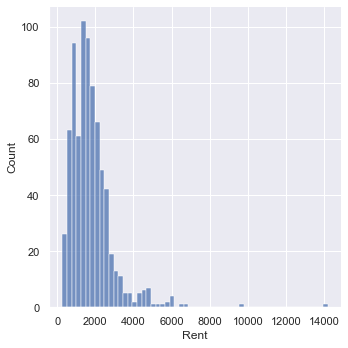

In [47]:
plt.figure(figsize=(16, 6))
sns.displot(df, x = 'Rent')

## What is the relationship between the construction year and the rent?

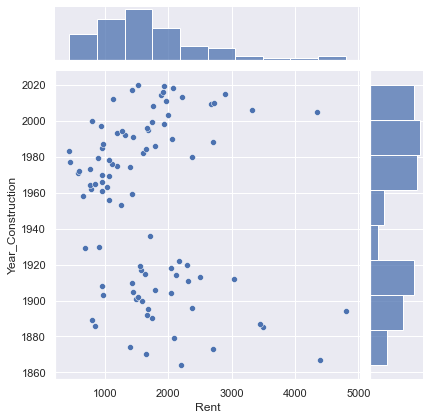

In [72]:
year_rent = df.groupby('Year_Construction')['Rent'].mean().reset_index()
sns.jointplot(x='Rent', y = 'Year_Construction', data= year_rent)

### It seems there is not relation ship!!!!

### Find a good flat!
My friend Josy is looking for a flat. She is still a student and cannot afford an expensive flat. Are there flats with a rent less than 500€ and more than 25 sqm (Space). She would like to move to Kreuzberg, Wedding, Prenzlauer Berg or Mitte. Any flats available for her? Is there a flat with two rooms and these constraints?

In [84]:
good_flat = df[(df['Rent']<=500) & (df['Space'] >=25) & ((df['Region'] == 'Kreuzberg') | (df['Region'] =='Wedding') |(df['Region']=='Prenzlauer') | (df['Region'] == 'Mitte'))]
good_flat

,Region,Condition,Rooms,Rent,Year_Construction,Space,sq/price,in shape
97,Wedding,no_information,2.0,383.46,1890,48.23,7.950653,False
152,Wedding,no_information,1.0,440.94,1983,41.45,10.637877,False
278,Wedding,no_information,1.0,352.95,1910,32.00,11.029687,False
239,Kreuzberg,well_kept,1.0,435.74,1966,38.00,11.466842,True
397,Wedding,well_kept,1.0,427.00,1956,37.16,11.490850,True
178,Wedding,need_of_renovation,1.0,458.91,1900,39.00,11.766923,False
